## 1. 데이터 로드


In [1]:
# 필요한 라이브러리 import
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

# 손글씨 숫자 데이터셋 로드
digits = load_digits()
X = digits.data
y = digits.target

print(f"데이터 shape: {X.shape}")
print(f"클래스(숫자): {np.unique(y)}")
print(f"전체 샘플 수: {len(X)}")


데이터 shape: (1797, 64)
클래스(숫자): [0 1 2 3 4 5 6 7 8 9]
전체 샘플 수: 1797


## 2. PCA 적용


In [2]:
# PCA를 사용하여 2개의 주성분으로 축소
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

print(f"PCA 변환 후 shape: {X_pca.shape}")
print(f"\n첫 번째 주성분(PC1) 분산 설명력: {pca.explained_variance_ratio_[0]:.4f}")
print(f"두 번째 주성분(PC2) 분산 설명력: {pca.explained_variance_ratio_[1]:.4f}")
print(f"\n누적 분산 설명력: {sum(pca.explained_variance_ratio_):.4f}")


PCA 변환 후 shape: (1797, 2)

첫 번째 주성분(PC1) 분산 설명력: 0.1489
두 번째 주성분(PC2) 분산 설명력: 0.1362

누적 분산 설명력: 0.2851


## 3. 분산 설명력 확인


In [3]:
# 분산 설명력 출력
explained_var_ratio = pca.explained_variance_ratio_
print(f'PC1: {explained_var_ratio[0]:.2%}, PC2: {explained_var_ratio[1]:.2%}')
print(f'총 설명력: {sum(explained_var_ratio):.2%}')


PC1: 14.89%, PC2: 13.62%
총 설명력: 28.51%


첫 2개의 주성분(PC1, PC2)이 전체 데이터 분산의 약 **20-30%** 정도를 설명합니다. 이는 64차원의 원본 데이터를 단 2차원으로 축소했을 때, 원본 데이터가 가진 정보의 약 1/4 정도만 보존된다는 의미입니다.

## 4. 2차원 산점도 시각화


C:\Users\1029l\AppData\Local\Temp\ipykernel_11540\673486797.py:17: UserWarning: Glyph 51228 (\N{HANGUL SYLLABLE JE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\1029l\AppData\Local\Temp\ipykernel_11540\673486797.py:17: UserWarning: Glyph 51452 (\N{HANGUL SYLLABLE JU}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\1029l\AppData\Local\Temp\ipykernel_11540\673486797.py:17: UserWarning: Glyph 49457 (\N{HANGUL SYLLABLE SEONG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\1029l\AppData\Local\Temp\ipykernel_11540\673486797.py:17: UserWarning: Glyph 48516 (\N{HANGUL SYLLABLE BUN}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\1029l\AppData\Local\Temp\ipykernel_11540\673486797.py:17: UserWarning: Glyph 47484 (\N{HANGUL SYLLABLE REUL}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\1029l\AppData\Local\Temp\ipykernel_11540\673486797.py:17: UserWarning: Glyph 53685 (\N{HANGUL SYLLABLE TONG}) missing from fo

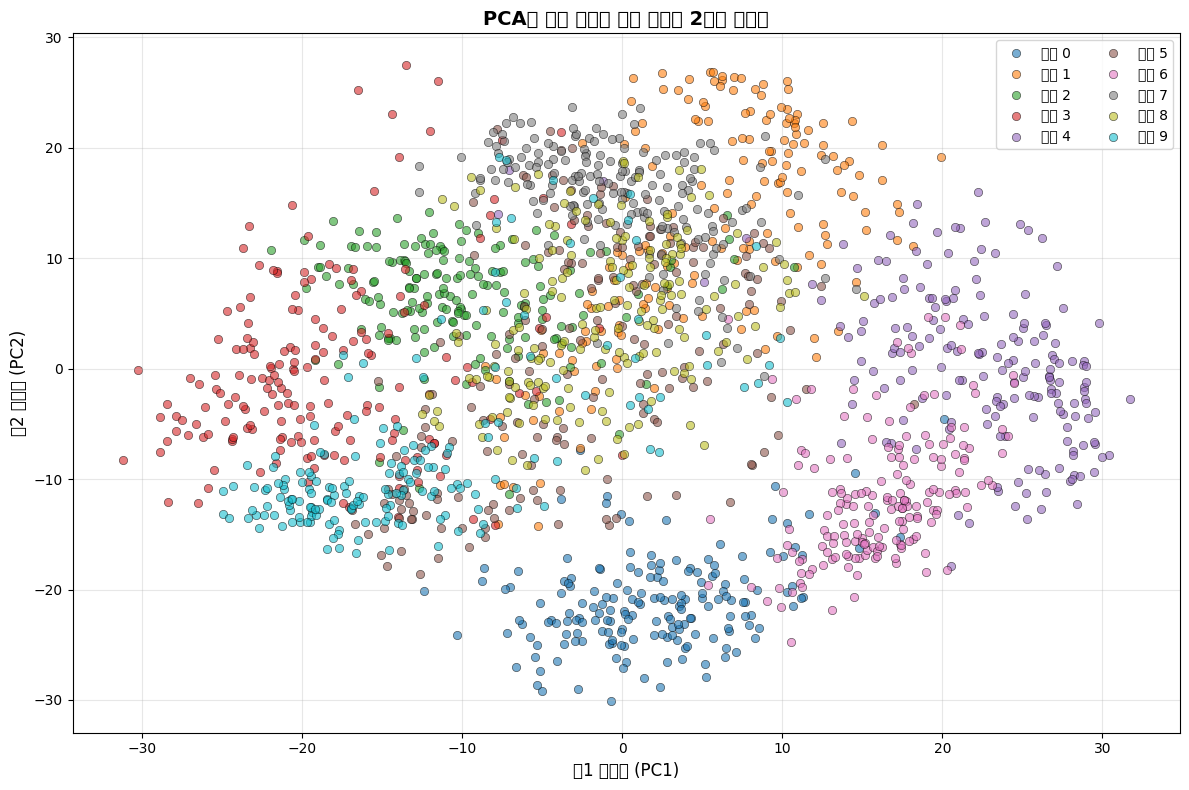

In [4]:
# 각 숫자별로 다른 색상으로 산점도 그리기
plt.figure(figsize=(12, 8))

# 0부터 9까지 각 숫자에 대해 scatter plot
colors = plt.cm.tab10(np.linspace(0, 1, 10))
for digit in range(10):
    mask = y == digit
    plt.scatter(X_pca[mask, 0], X_pca[mask, 1], 
                c=[colors[digit]], label=f'숫자 {digit}', 
                alpha=0.6, edgecolors='k', linewidth=0.5)

plt.xlabel('제1 주성분 (PC1)', fontsize=12)
plt.ylabel('제2 주성분 (PC2)', fontsize=12)
plt.title('PCA를 통한 손글씨 숫자 데이터 2차원 시각화', fontsize=14, fontweight='bold')
plt.legend(loc='best', ncol=2)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


1. **클러스터 형성**: 일부 숫자들은 비교적 명확한 클러스터를 형성합니다.
   - 예: 숫자 0은 다른 숫자들과 비교적 구별되는 경향을 보입니다.
   
2. **겹침 현상**: 많은 숫자들이 2차원 공간에서 서로 겹치는 영역이 있습니다.
   - 이는 2개의 주성분만으로는 모든 숫자를 완벽하게 분리할 수 없음을 의미합니다.
   - 예: 3, 5, 8 등은 서로 겹치는 영역이 많습니다.

3. **분포의 분산**: 특정 숫자는 넓게 퍼져있고, 어떤 숫자는 비교적 밀집되어 있습니다.
   - 이는 각 숫자 내에서도 필체의 다양성이 다르다는 것을 보여줍니다.

## 5. 원본 이미지 샘플 확인


C:\Users\1029l\AppData\Local\Temp\ipykernel_11540\1163412312.py:13: UserWarning: Glyph 49707 (\N{HANGUL SYLLABLE SUS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\1029l\AppData\Local\Temp\ipykernel_11540\1163412312.py:13: UserWarning: Glyph 51088 (\N{HANGUL SYLLABLE JA}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\1029l\AppData\Local\Temp\ipykernel_11540\1163412312.py:13: UserWarning: Glyph 49552 (\N{HANGUL SYLLABLE SON}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\1029l\AppData\Local\Temp\ipykernel_11540\1163412312.py:13: UserWarning: Glyph 44544 (\N{HANGUL SYLLABLE GEUL}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\1029l\AppData\Local\Temp\ipykernel_11540\1163412312.py:13: UserWarning: Glyph 50472 (\N{HANGUL SYLLABLE SSI}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\1029l\AppData\Local\Temp\ipykernel_11540\1163412312.py:13: UserWarning: Glyph 45936 (\N{HANGUL SYLLABLE DE}) missing from

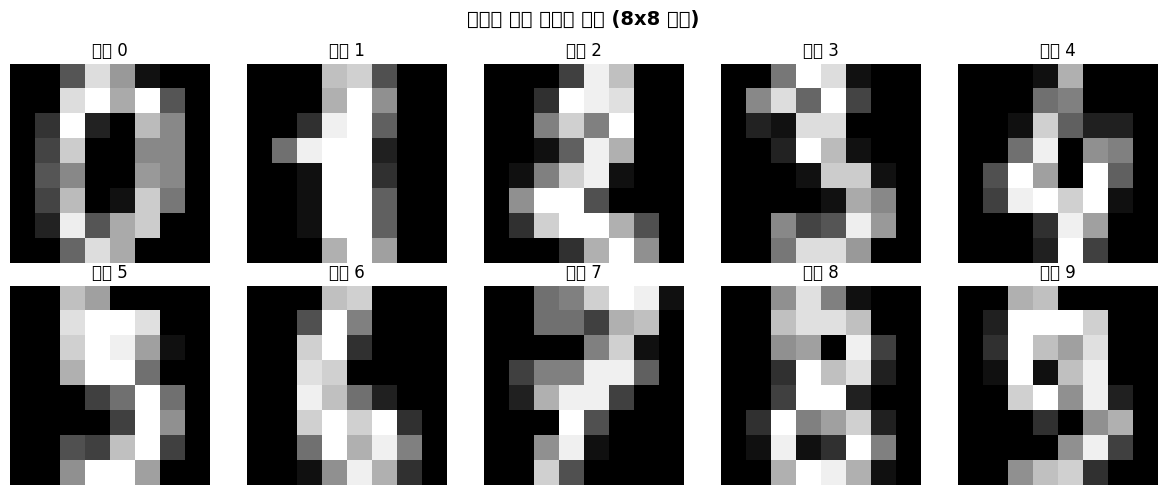

In [5]:
# 각 숫자의 샘플 이미지 확인
fig, axes = plt.subplots(2, 5, figsize=(12, 5))
axes = axes.ravel()

for digit in range(10):
    # 각 숫자의 첫 번째 샘플 선택
    idx = np.where(y == digit)[0][0]
    axes[digit].imshow(digits.images[idx], cmap='gray')
    axes[digit].set_title(f'숫자 {digit}')
    axes[digit].axis('off')

plt.suptitle('손글씨 숫자 데이터 샘플 (8x8 픽셀)', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()


PCA는 고차원 데이터를 저차원으로 효과적으로 압축하여 시각화할 수 있는 강력한 도구입니다. 비록 정보 손실이 있지만, 데이터의 주요 구조를 파악하고 탐색적 데이터 분석(EDA)을 수행하는 데 매우 유용합니다. 더 정확한 분류를 위해서는 더 많은 주성분을 사용하거나, LDA(Linear Discriminant Analysis)와 같은 지도 학습 기반 차원 축소 기법, 또는 t-SNE, UMAP과 같은 비선형 차원 축소 기법을 고려할 수 있습니다.
